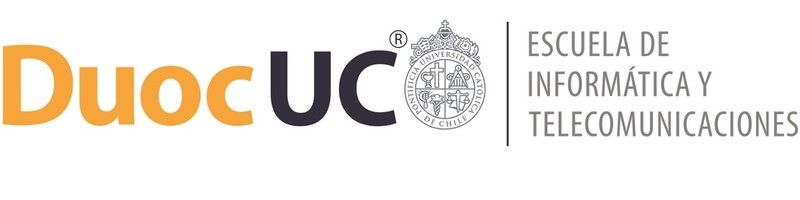

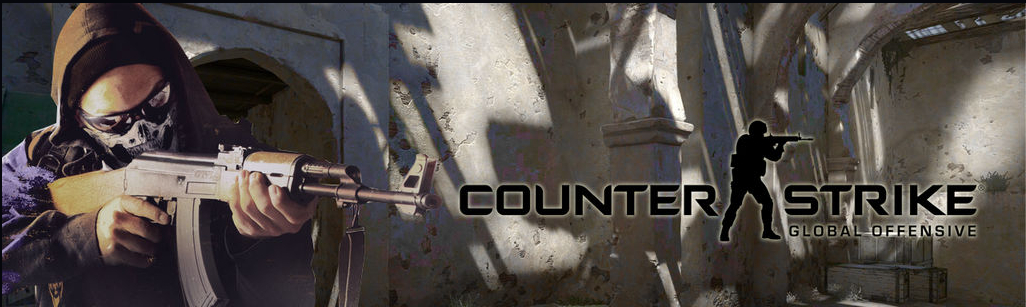

# Informe Técnico - Examen Transversal: Caso Counter Strike


Integrantes: Sebastián Carrera, Yasna Villarroel y Kevin Vivanco
Docente: Giocrisrai Godoy    

Sección: MLY0100 - 002D

# Caso Fundamentos de Machine Learning

CONTEXTO CASO

Valve, los ha contactado como equipo de análisis de datos y modelado de Machine Learning para analizar y realizar modelos predictivos sobre los datos.

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan.


El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios específicos dentro de un mapa. Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada. Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un máximo de 10 jugadores c/u)  


Los datos han sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas por cada jugador dentro de una partida. Los replays han sido extraídos de la red utilizando un scrapper y pre-procesados utilizando un script.  



En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego.


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Map & \text {Nombre  del Mapa donde se jugó la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador ganó o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador ganó o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$

## Fase 1: Business Understanding

## Objetivo del proyecto

El objetivo de este proyecto es analizar los datos de las partidas del videojuego Counter Strike: GO con el fin de afirmar o descartar las hipótesis planteadas a continuación.

#Obj de clasificación global

1.3.1 Clasificación: ¿Se puede predecir si un jugador sobrevivirá la ronda?
Descripción:

Desarrollar un modelo de clasificación que, utilizando variables del desempeño del jugador y el contexto de la ronda, prediga si un jugador sobrevivirá o no la ronda.
Variables relevantes:

🔹 Survived: Sobrevivencia en la ronda.
🔹 RoundKills: Cantidad de enemigos eliminados por el jugador en la ronda.
🔹 RoundHeadshots: Cantidad de tiros a la cabeza realizados por el jugador en la ronda.
🔹 RoundStartingEquipmentValue: Valor del equipamiento del jugador al inicio de la ronda.
Hipótesis:

"La probabilidad de que un jugador sobreviva una ronda depende del valor de su equipamiento inicial y de su capacidad para eliminar enemigos durante la ronda."


## Fase 2: Data Understanding

In [ ]:
import pandas as pd
import numpy as np


from google.colab import files
import pandas as pd

uploaded = files.upload()

for fn in uploaded.keys():
    name = fn

# Leer el CSV usando punto y coma como separador
df = pd.read_csv(name, sep=";")


Saving csgo_datos_corregidos.csv to csgo_datos_corregidos.csv


#mapa de correlacion

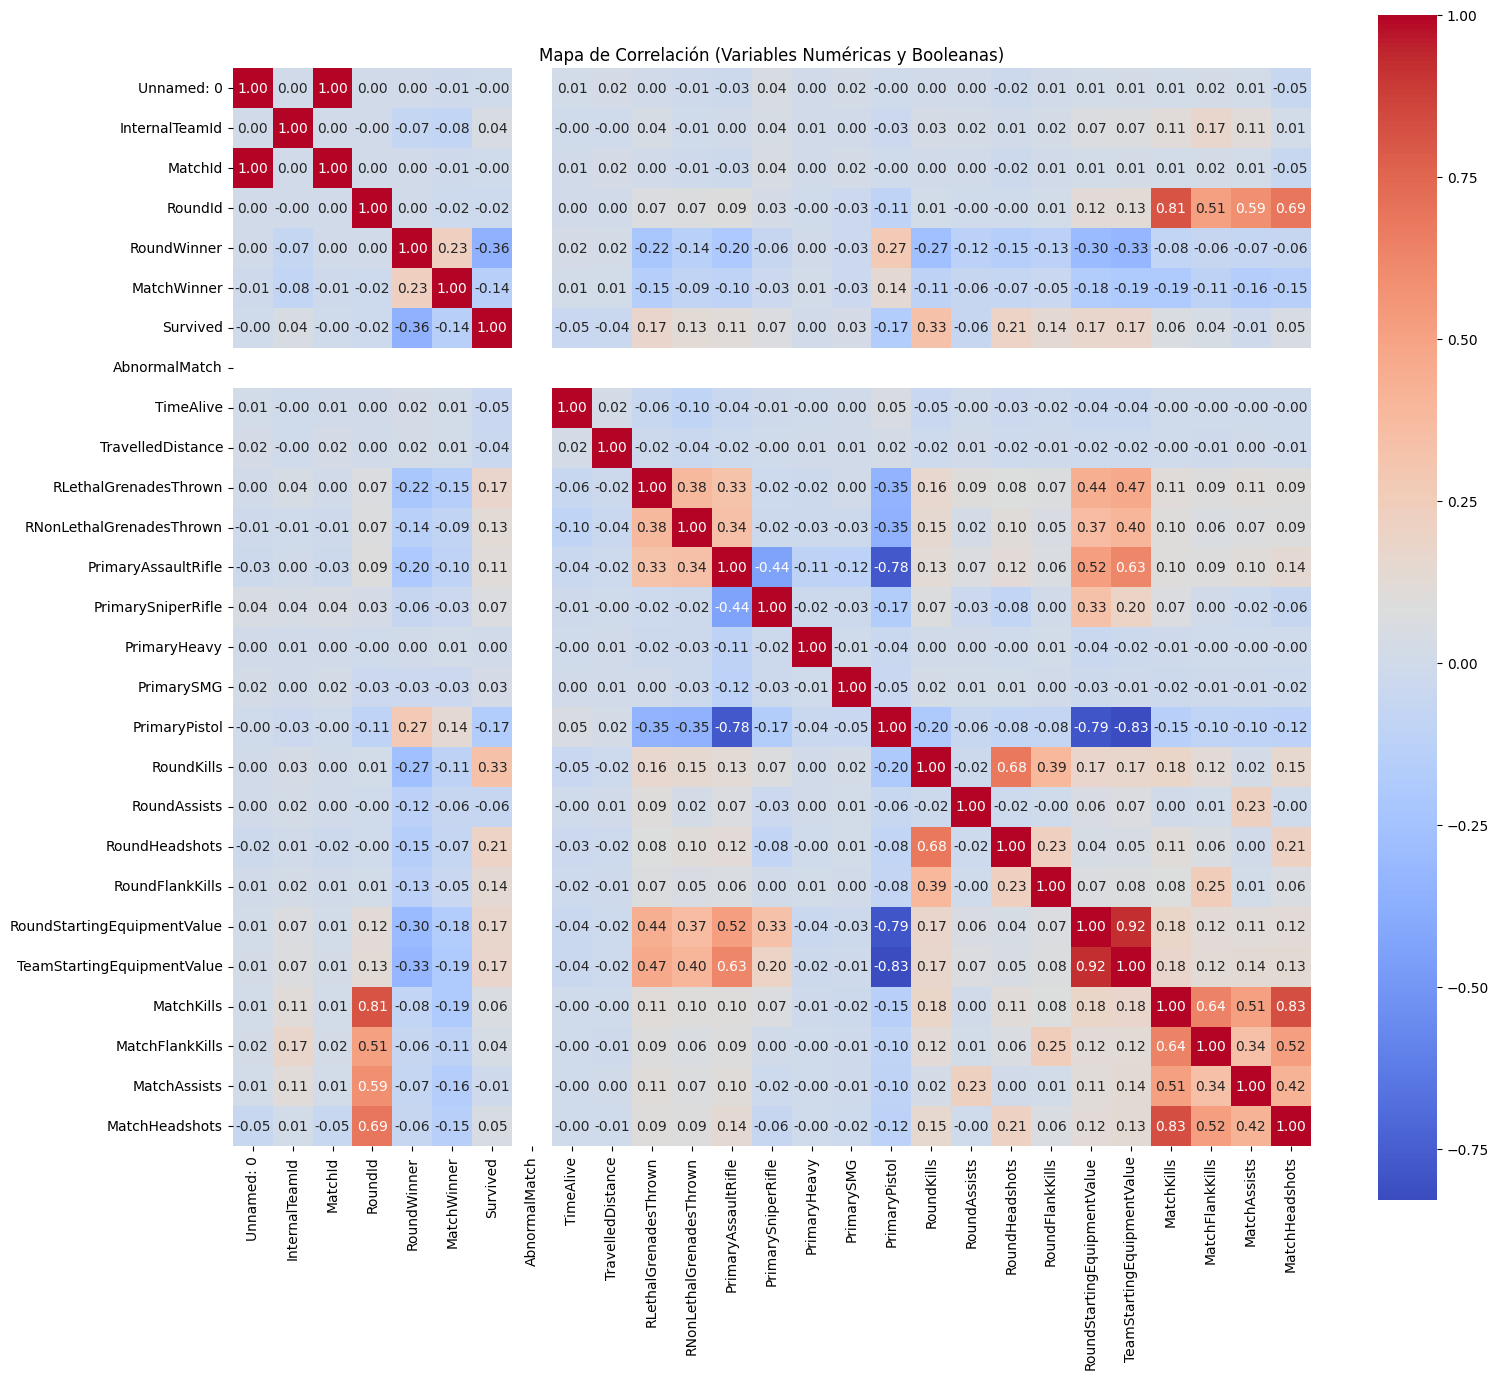

In [ ]:
# Crear un mapa de calor de correlaciones entre todas las variables numéricas y booleanas,
# centrado en ver la relación con la variable objetivo 'Survived'
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar variables numéricas y booleanas
numeric_df = df.select_dtypes(include=['number', 'bool'])

# Calcular la matriz de correlación completa
correlation_matrix = numeric_df.corr()

# Generar mapa de calor completo
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Mapa de Correlación (Variables Numéricas y Booleanas)")
plt.tight_layout()
plt.show()


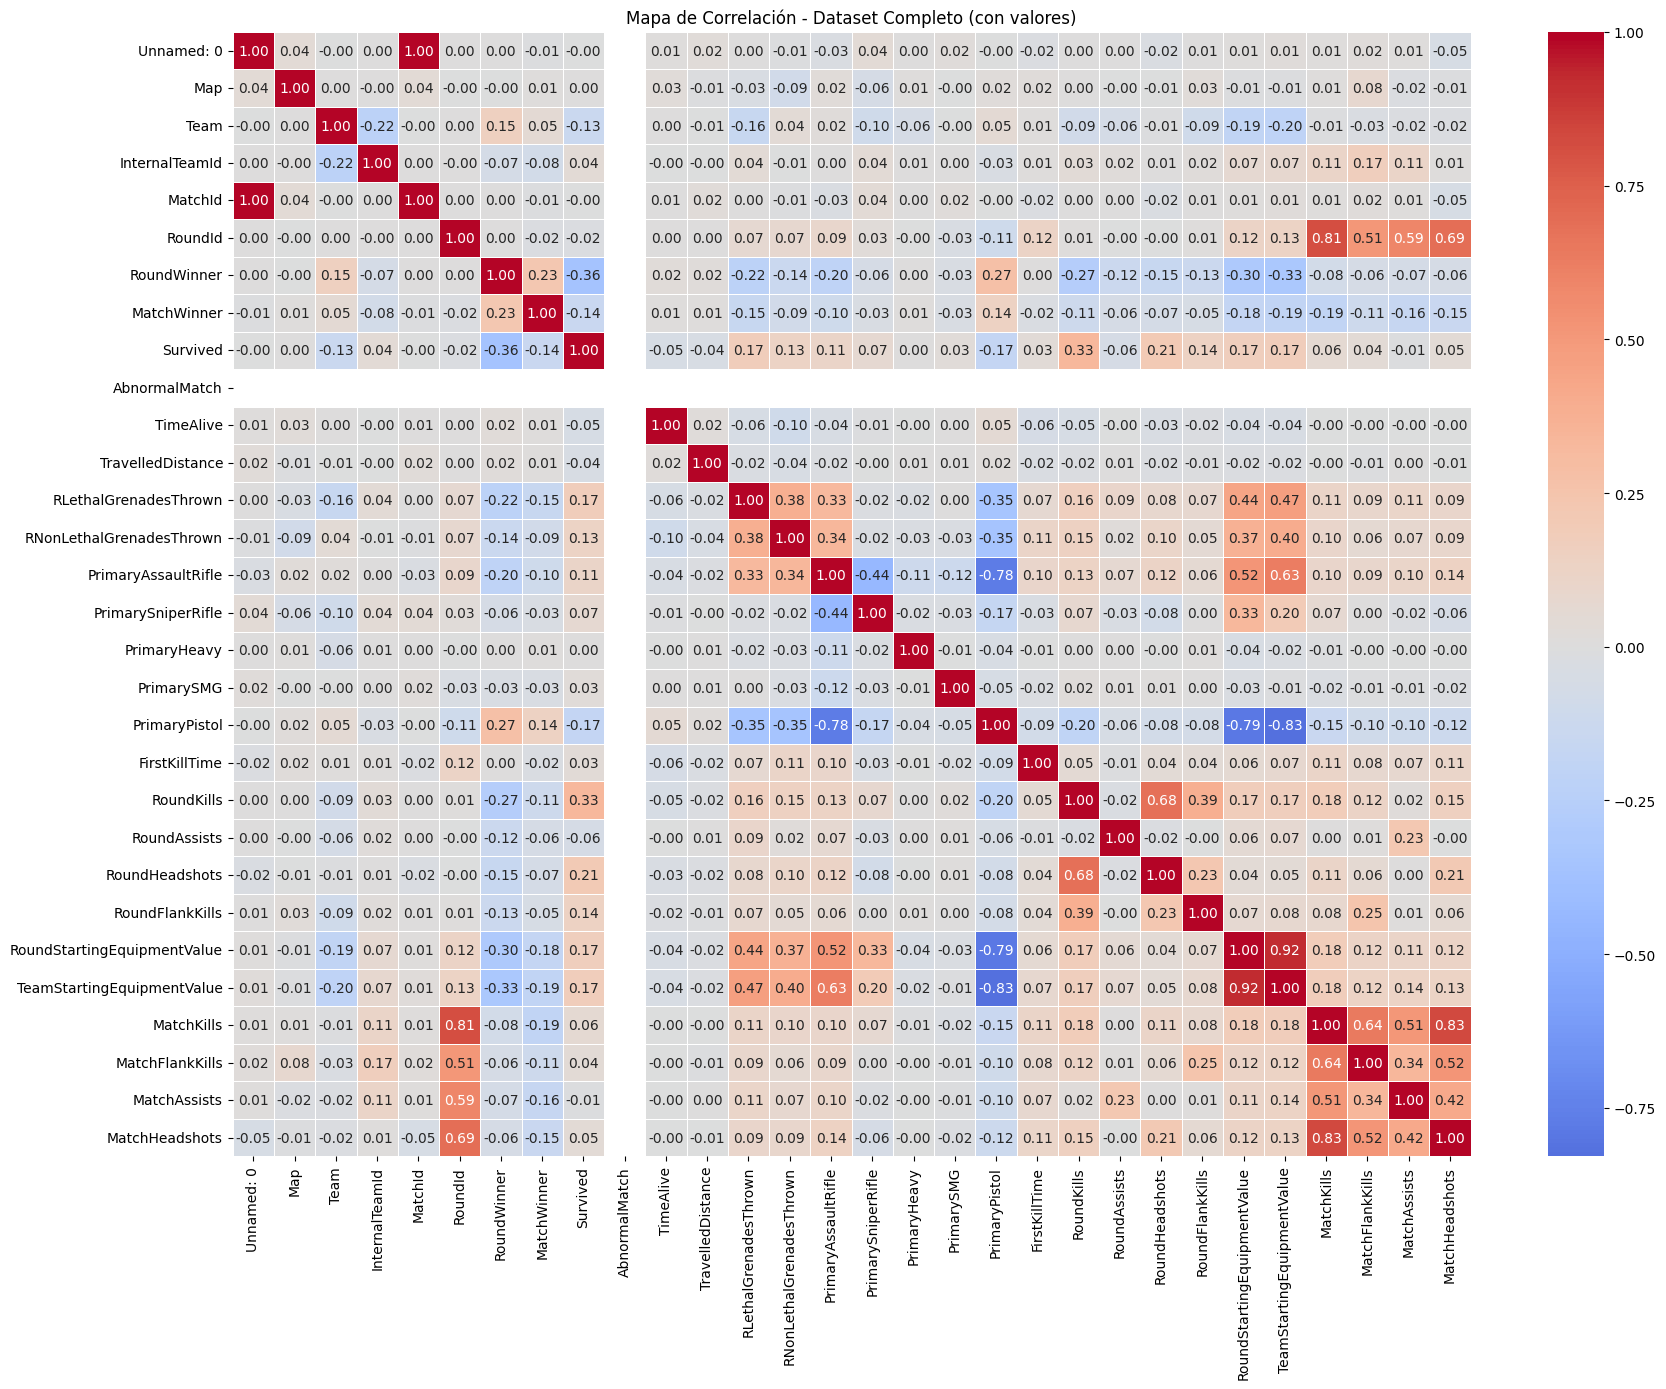

In [ ]:
# 📦 Importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# 📥 Cargar archivo (¡sube tu CSV en el panel izquierdo!)
df = pd.read_csv("csgo_datos_corregidos.csv", sep=';')

# 🔄 Codificar columnas no numéricas
non_numeric_cols = df.select_dtypes(exclude=['number']).columns.tolist()

df_encoded = df.copy()
for col in non_numeric_cols:
    try:
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])
    except:
        pass

# 🧮 Calcular correlaciones
correlation_matrix = df_encoded.corr()

# 🔥 Heatmap con valores visibles
plt.figure(figsize=(18, 14))
sns.heatmap(
    correlation_matrix,
    cmap='coolwarm',
    center=0,
    annot=True,        # 👈 ¡Esto muestra los valores!
    fmt=".2f",         # Mostrar con 2 decimales
    linewidths=0.5
)
plt.title("Mapa de Correlación - Dataset Completo (con valores)")
plt.tight_layout()
plt.show()

In [ ]:
# Calculamos la matriz de correlación
correlation_matrix = df.corr(numeric_only=True)

# Extraemos la correlación con la variable objetivo
target_corr = correlation_matrix['Survived'].drop('Survived')

# Filtramos las variables con correlación absoluta mayor a un umbral
relevant_features = target_corr[abs(target_corr) > 0.1].index.tolist()

# Incluimos también la variable objetivo
relevant_features.append('Survived')

# Creamos el nuevo DataFrame filtrado
df_corr = df[relevant_features]

print(f"Variables seleccionadas: {relevant_features}")
df_corr.head()

Variables seleccionadas: ['RoundWinner', 'MatchWinner', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimaryPistol', 'RoundKills', 'RoundHeadshots', 'RoundFlankKills', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue', 'Survived']


,RoundWinner,MatchWinner,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimaryPistol,RoundKills,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,Survived
0,False,True,0,4,0.0,1,0,0,0,750,4400,False
1,False,True,0,0,0.0,1,0,0,0,800,4400,False
2,False,True,0,0,0.0,1,0,0,0,1000,4400,False
3,False,True,0,0,0.0,1,0,0,0,850,4400,False
4,False,True,1,1,0.0,1,0,0,0,1000,4400,True


Variables relevantes


RoundWinner, MatchWinner, RLethalGrenadesThrown, RNonLethalGrenadesThrown,
PrimaryAssaultRifle, PrimaryPistol, RoundKills, RoundHeadshots, Survived, RoundFlankKills, RoundStartingEquipmentValue, TeamStartingEquipmentValue

In [ ]:
#Dataframe con las columnas relevantes
selected_features = [
    'RoundWinner',
    'MatchWinner',
    'RLethalGrenadesThrown',
    'RNonLethalGrenadesThrown',
    'PrimaryAssaultRifle',
    'PrimaryPistol',
    'RoundKills',
    'RoundHeadshots',
    'RoundFlankKills',
    'RoundStartingEquipmentValue',
    'TeamStartingEquipmentValue',
    'Survived'
]

df_corr = df[selected_features].copy()

#Eliminar variables

#Eliminada por alta colinealidad con RoundTeamStartingEquipmentValue
df_corr = df_corr.drop(columns=['TeamStartingEquipmentValue'])

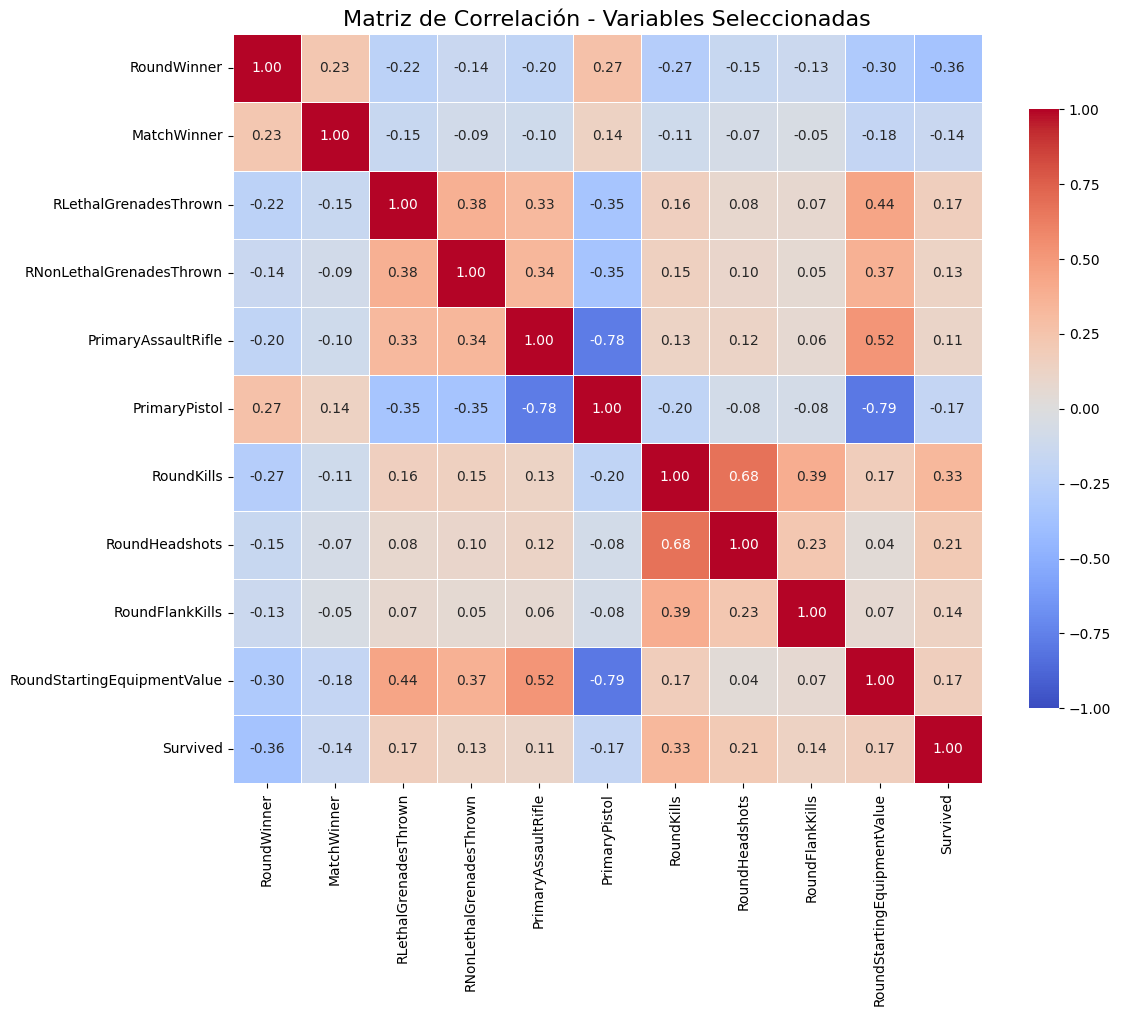

In [ ]:
# Calculamos la matriz de correlación
corr_matrix = df_corr.corr()

# Configuramos el tamaño del gráfico
plt.figure(figsize=(12, 10))

# Dibujamos el heatmap
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": .8}
)

plt.title("Matriz de Correlación - Variables Seleccionadas", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
#Nuevas variables
#ratio de headshots
df_corr['HeadshotRate'] = df_corr['RoundHeadshots'] / (df_corr['RoundKills'] + 1)
#estilo de juego agresivo/flankeador
df_corr['FlankRate'] = df_corr['RoundFlankKills'] / (df_corr['RoundKills'] + 1)
#eficiencia ofensiva
df_corr['KillEfficiency'] = df_corr['RoundKills'] / (df_corr['RLethalGrenadesThrown'] + df_corr['RNonLethalGrenadesThrown'] + 1)
#AgressionScore Cuan agresivo es un jugador en la ronda
df_corr['AggressionScore'] = df_corr['RoundKills'] + 0.5 * df_corr['RoundHeadshots'] + 0.3 * df_corr['RoundFlankKills']
#DefenseProxy Segun si lanza muchas granadas y mata poco
df_corr['DefenseProxy'] = (df_corr['RLethalGrenadesThrown'] + df_corr['RNonLethalGrenadesThrown']) / (df_corr['RoundKills'] + 1)
#participaciones ofensivas
df_corr['EngagementCount'] = df_corr['RoundKills'] + df_corr['RoundHeadshots'] + df_corr['RoundFlankKills']
#equipment per kill
df_corr['EquipmentPerKill'] = df_corr['RoundStartingEquipmentValue'] / (df_corr['RoundKills'] + 1)
#Cuantas granadas uso
df_corr['CombinedGrenades'] = df_corr['RLethalGrenadesThrown'] + df_corr['RNonLethalGrenadesThrown']

#Eliminar variables con poca relevancia
cols_to_drop = [
    'MatchWinner',               # Correlación ~ -0.14
    'RoundHeadshots',            # Ya incluida en AggressionScore y EngagementCount
    'PrimaryAssaultRifle',       # Su efecto ya está absorbido por otras variables
    'RoundFlankKills',           # Ya usada en otras variables combinadas
    'RNonLethalGrenadesThrown',  # Ya está en CombinedGrenades
    'DefenseProxy'               # Ya lo habías identificado antes
]

# Eliminar del DataFrame
df_corr = df_corr.drop(columns=cols_to_drop)

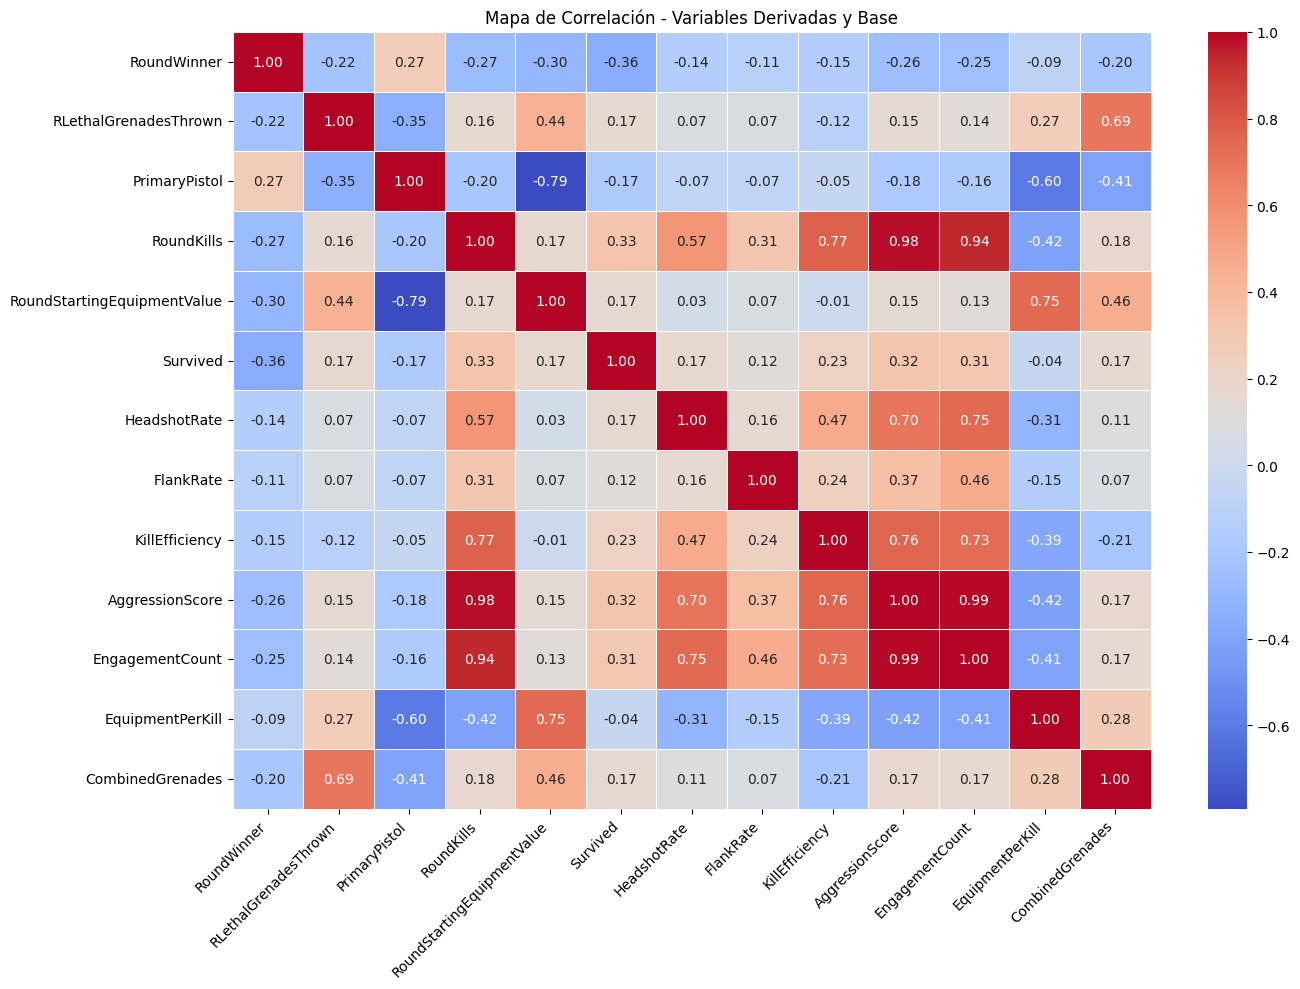

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular matriz de correlación
correlation_matrix = df_corr.corr()

# Graficar heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Mapa de Correlación - Variables Derivadas y Base")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

ESTO ES PARA ELIMINAR OUTLIERS SEGUN IQR

In [ ]:
#limpieza outliers
# Función para aplicar regla del IQR
def eliminar_outliers_iqr(df, columnas):
    df_filtrado = df.copy()
    for col in columnas:
        Q1 = df_filtrado[col].quantile(0.25)
        Q3 = df_filtrado[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + 1.5 * IQR
        # También podrías agregar un lower_bound si lo consideras necesario
        df_filtrado = df_filtrado[df_filtrado[col] <= upper_bound]
    return df_filtrado

# Variables que presentan outliers importantes
variables_con_outliers = [
    'RoundStartingEquipmentValue',
    'AggressionScore',
    'EngagementCount',
    'KillEfficiency',
    'EquipmentPerKill',
    'CombinedGrenades'
]

# Aplicar la limpieza
df_corr_limpio = eliminar_outliers_iqr(df_corr, variables_con_outliers)

# Mostrar cuántas filas se eliminaron
print(f"Filas antes: {df_corr.shape[0]}")
print(f"Filas después: {df_corr_limpio.shape[0]}")
print(f"Se eliminaron: {df_corr.shape[0] - df_corr_limpio.shape[0]} filas por outliers.")


Filas antes: 79157
Filas después: 74804
Se eliminaron: 4353 filas por outliers.


#Modelo LogisticRegression



#Ejecución del modelo

📊 Accuracy: 0.7023328280276234

📋 Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.68      0.73     14165
        True       0.61      0.73      0.66      9583

    accuracy                           0.70     23748
   macro avg       0.70      0.71      0.70     23748
weighted avg       0.72      0.70      0.71     23748


🧱 Confusion Matrix:
[[9701 4464]
 [2605 6978]]


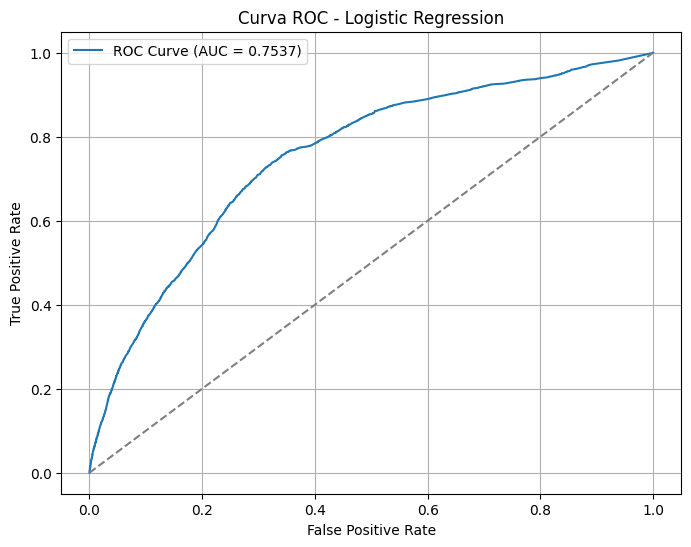

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_auc_score,
    roc_curve
)
import numpy as np

# 1️⃣ Variables predictoras y target
X = df_corr.drop(columns=['Survived'])
y = df_corr['Survived']

# 2️⃣ División de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 3️⃣ Modelo de regresión logística
model = LogisticRegression(max_iter=3000, class_weight='balanced')
model.fit(X_train, y_train)

# 4️⃣ Predicciones
# y_pred = model.predict(X_test)
# y_proba = model.predict_proba(X_test)[:, 1]

y_proba = model.predict_proba(X_test)[:, 1]
custom_threshold = 0.5
y_pred_custom = (y_proba >= custom_threshold).astype(int)

# 5️⃣ Evaluación
print("📊 Accuracy:", accuracy_score(y_test, y_pred_custom))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred_custom))
print("\n🧱 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_custom))

# 6️⃣ Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()


#Prueba 2
Cambio de valores VARIABLE C

📊 Accuracy: 0.7023328280276234

📋 Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.69      0.73     14165
        True       0.61      0.73      0.66      9583

    accuracy                           0.70     23748
   macro avg       0.70      0.71      0.70     23748
weighted avg       0.72      0.70      0.71     23748


🧱 Confusion Matrix:
 [[9704 4461]
 [2608 6975]]


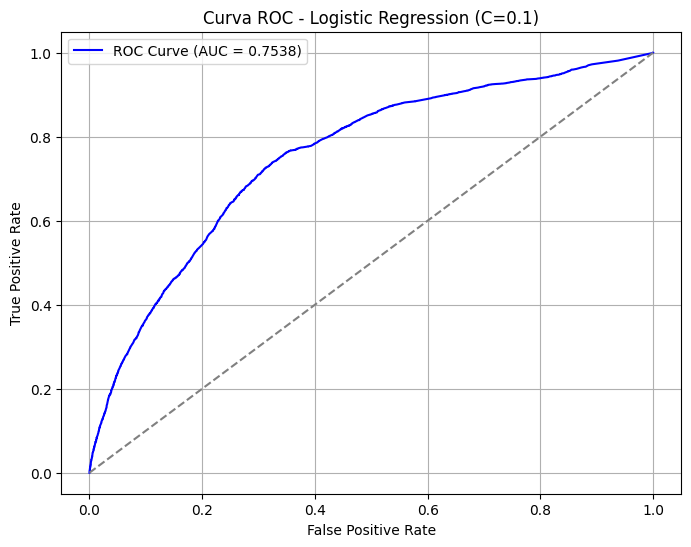

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, roc_auc_score
)
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1️⃣ Variables predictoras y target
X = df_corr.drop(columns=['Survived'])
y = df_corr['Survived']

# 2️⃣ División del dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# 3️⃣ Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4️⃣ Modelo con mejores parámetros
model = LogisticRegression(
    C=0.1,
    penalty='l2',
    solver='lbfgs',
    max_iter=3000,
    class_weight='balanced'
)
model.fit(X_train_scaled, y_train)

# 5️⃣ Predicción
y_proba = model.predict_proba(X_test_scaled)[:, 1]
y_pred = (y_proba >= 0.5).astype(int)  # Puedes ajustar este umbral

# 6️⃣ Evaluación
print("📊 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧱 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 7️⃣ Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.4f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle="--", color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Logistic Regression (C=0.1)")
plt.legend()
plt.grid(True)
plt.show()

#Prueba 3

Nuevas variables

In [ ]:
# 1. AggroRatio - Nivel de agresividad
df_corr['AggroRatio'] = df_corr['RoundKills'] / (df['TimeAlive'] + 1)

# 2. KillPerUtility - Eficiencia de kills por utilidad
df_corr['KillPerUtility'] = df_corr['RoundKills'] / (df_corr['CombinedGrenades'] + 1)

# 3. UtilityHeaviness - Proporción de granadas no letales
df_corr['UtilityHeaviness'] = df['RNonLethalGrenadesThrown'] / (df_corr['CombinedGrenades'] + 1)

# 4. HasRifle - Si el jugador tiene rifle principal
df_corr['HasRifle'] = (df['PrimaryAssaultRifle'] == 1).astype(int)

# 5. IsClutchRound - Si es una ronda de presión (últimas rondas o vida corta)
df_corr['IsClutchRound'] = ((df['RoundId'] >= 26) | (df['TimeAlive'] < 15)).astype(int)

# 6. EconomicStatus - Categoría económica según valor de equipamiento
df_corr['EconomicStatus'] = pd.cut(df_corr['RoundStartingEquipmentValue'],
                                   bins=[0, 1000, 3000, 6000],
                                   labels=['Eco', 'Force', 'Full'])

# 7. AggroKillRatio - kills por total de enganches
df_corr['AggroKillRatio'] = df_corr['RoundKills'] / (df_corr['EngagementCount'] + 1)

/tmp/ipython-input-22-2243455855.py:5: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


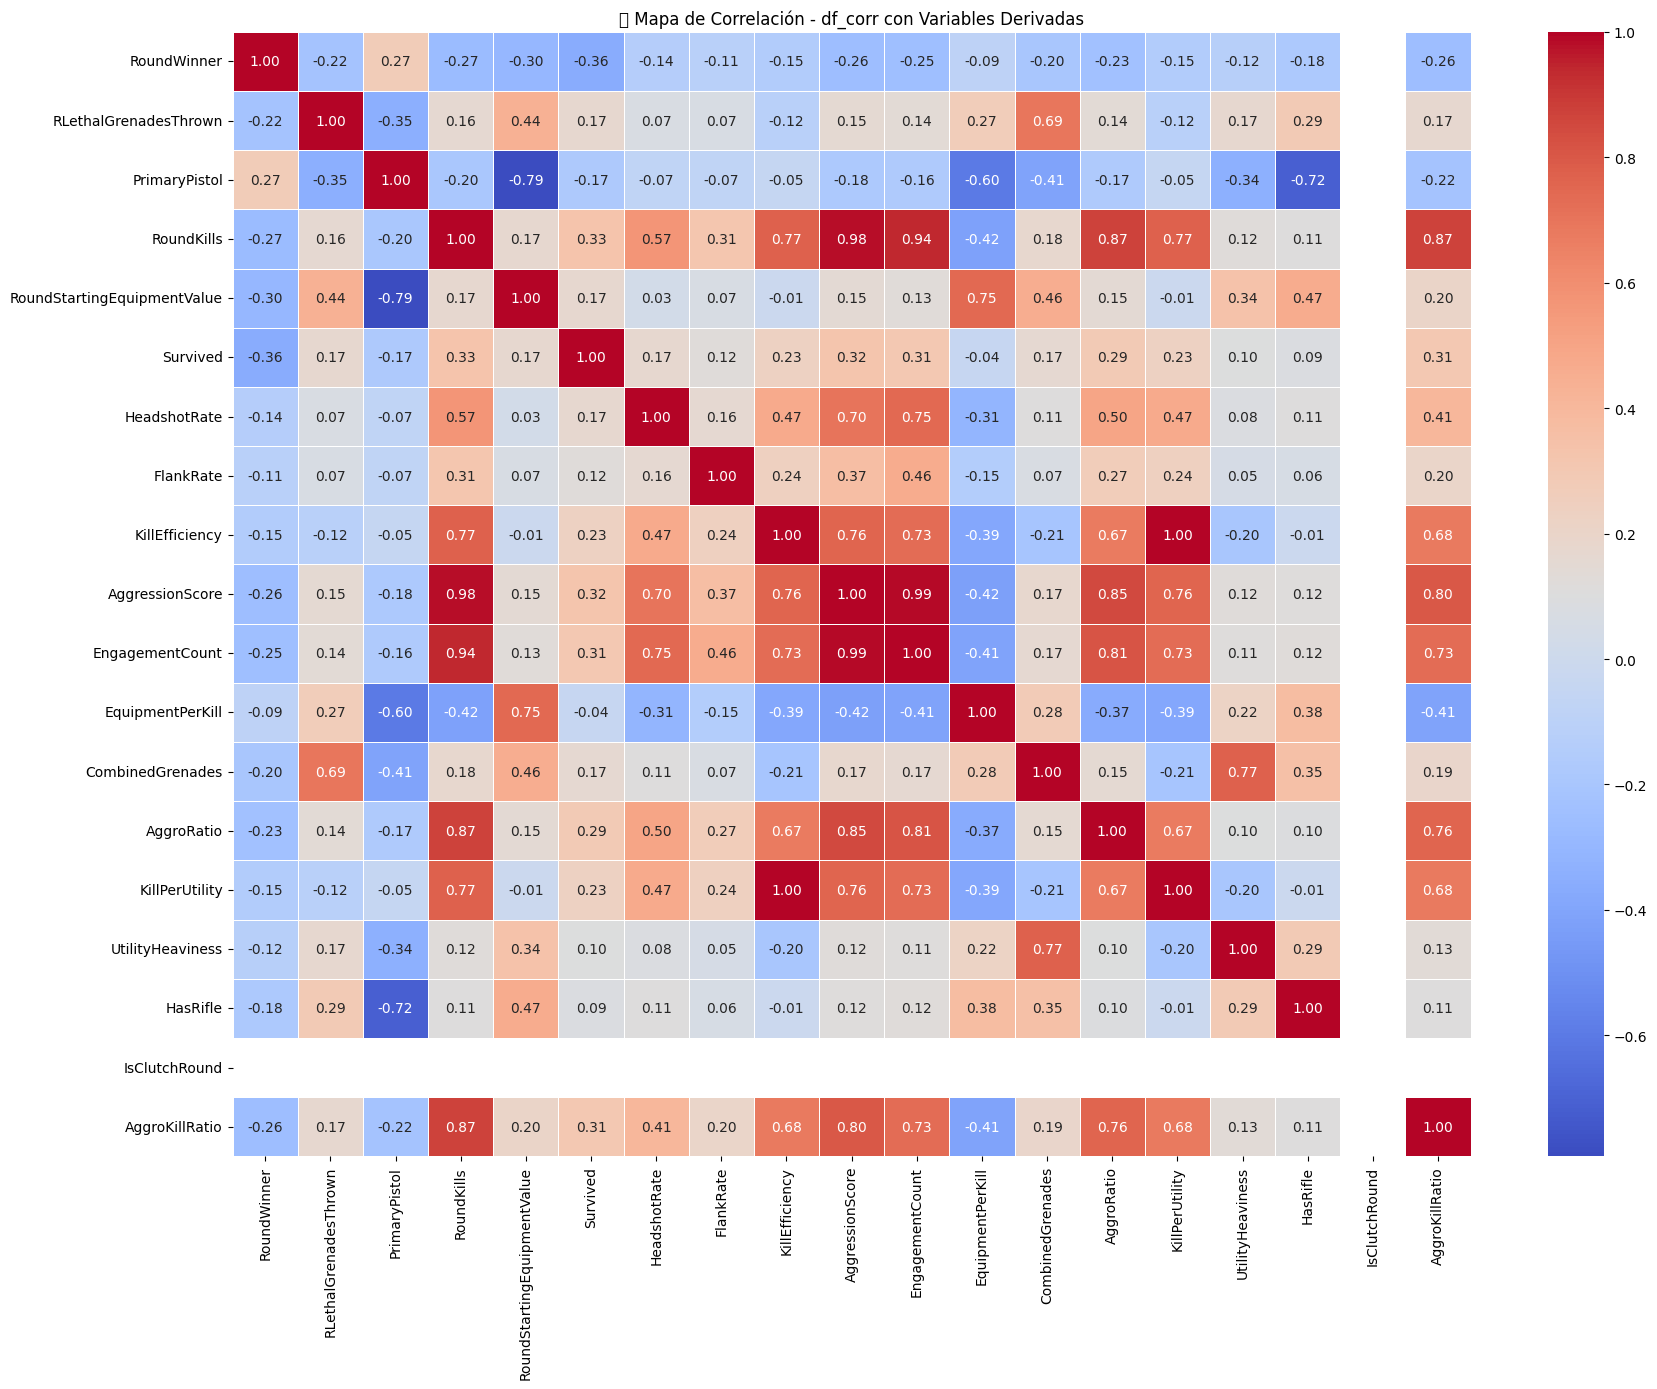

In [ ]:
# Mapa de correlación
plt.figure(figsize=(18, 14))
sns.heatmap(df_corr.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("🔍 Mapa de Correlación - df_corr con Variables Derivadas")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


📊 Accuracy: 0.7084807141654034

📋 Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.70      0.74     14165
        True       0.62      0.73      0.67      9583

    accuracy                           0.71     23748
   macro avg       0.70      0.71      0.70     23748
weighted avg       0.72      0.71      0.71     23748


🧱 Confusion Matrix:
 [[9863 4302]
 [2621 6962]]

🔢 ROC AUC: 0.7600198153579633


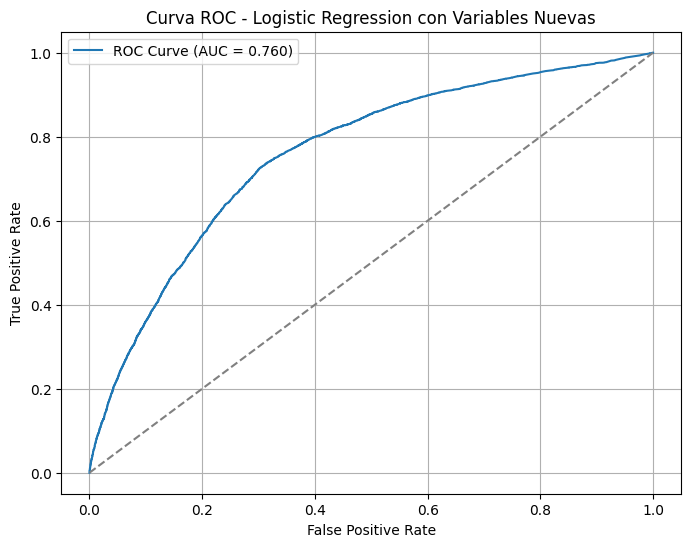

In [ ]:
# Codificar EconomicStatus
df_corr = pd.get_dummies(df_corr, columns=['EconomicStatus'], drop_first=True)

# -------------------------------
# Modelo LogisticRegression
# -------------------------------

X = df_corr.drop(columns=['Survived'])
y = df_corr['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

model = LogisticRegression(C=0.1, penalty='l2', solver='lbfgs', max_iter=3000, class_weight='balanced')
model.fit(X_train, y_train)

# Predicción y evaluación
y_proba = model.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.5).astype(int)

print("📊 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧱 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n🔢 ROC AUC:", roc_auc_score(y_test, y_proba))

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_proba):.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Logistic Regression con Variables Nuevas")
plt.grid(True)
plt.legend()
plt.show()

#Prueba (EXTRA)


#Prueba de KMEANS


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1️⃣ Escalar las variables predictoras (sin 'Survived')
features = df_corr.drop(columns=['Survived'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# 2️⃣ Aplicar KMeans (ej: 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# 3️⃣ Asignar cluster al DataFrame
df_corr['Cluster'] = clusters

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


📊 Accuracy: 0.7009853461344113

📋 Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.68      0.73     14165
        True       0.61      0.73      0.66      9583

    accuracy                           0.70     23748
   macro avg       0.70      0.71      0.70     23748
weighted avg       0.71      0.70      0.70     23748


🧱 Confusion Matrix:
 [[9687 4478]
 [2623 6960]]


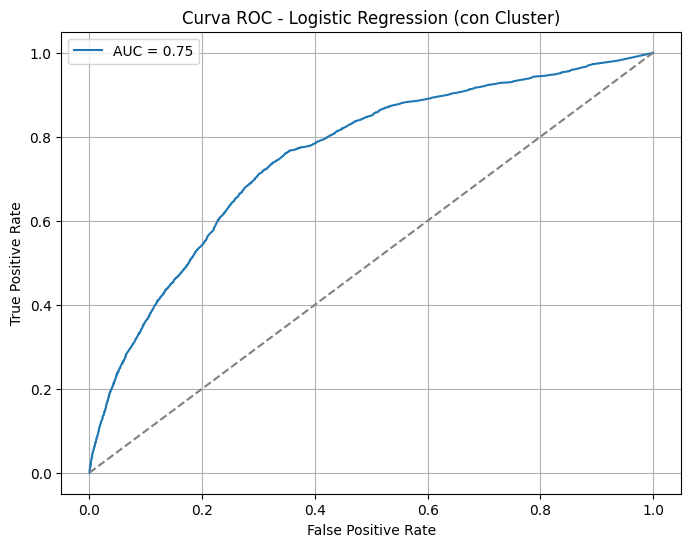

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 1️⃣ Features (todas excepto la target)
X = df_corr.drop(columns=['Survived'])
y = df_corr['Survived']

# 2️⃣ Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3️⃣ Entrenar modelo con clase balanceada
model = LogisticRegression(max_iter=3000, class_weight='balanced')
model.fit(X_train, y_train)

# 4️⃣ Predicción de probabilidades y etiquetas
y_proba = model.predict_proba(X_test)[:, 1]
threshold = 0.5  # Puedes ajustar si quieres optimizar recall/precision
y_pred = (y_proba >= threshold).astype(int)

# 5️⃣ Evaluación
print("📊 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧱 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 6️⃣ Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Logistic Regression (con Cluster)")
plt.legend()
plt.grid(True)
plt.show()


#Esto fue para medir varios modelos


In [ ]:
# Selección de columnas y creación de variables derivadas como antes

# Paso 1: columnas originales
selected_features = [
    'RoundWinner', 'MatchWinner', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown',
    'PrimaryAssaultRifle', 'PrimaryPistol', 'RoundKills', 'RoundHeadshots',
    'RoundFlankKills', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
    'Survived'
]
df_corr = df[selected_features].copy()
df_corr = df_corr.drop(columns=['TeamStartingEquipmentValue'])

# Paso 2: nuevas variables
df_corr['HeadshotRate'] = df_corr['RoundHeadshots'] / (df_corr['RoundKills'] + 1)
df_corr['FlankRate'] = df_corr['RoundFlankKills'] / (df_corr['RoundKills'] + 1)
df_corr['KillEfficiency'] = df_corr['RoundKills'] / (
    df_corr['RLethalGrenadesThrown'] + df_corr['RNonLethalGrenadesThrown'] + 1)
df_corr['AggressionScore'] = df_corr['RoundKills'] + 0.5 * df_corr['RoundHeadshots'] + 0.3 * df_corr['RoundFlankKills']
df_corr['DefenseProxy'] = (df_corr['RLethalGrenadesThrown'] + df_corr['RNonLethalGrenadesThrown']) / (
    df_corr['RoundKills'] + 1)
df_corr['EngagementCount'] = df_corr['RoundKills'] + df_corr['RoundHeadshots'] + df_corr['RoundFlankKills']
df_corr['EquipmentPerKill'] = df_corr['RoundStartingEquipmentValue'] / (df_corr['RoundKills'] + 1)
df_corr['CombinedGrenades'] = df_corr['RLethalGrenadesThrown'] + df_corr['RNonLethalGrenadesThrown']

# Paso 3: eliminación de columnas redundantes
cols_to_drop = [
    'MatchWinner', 'RoundHeadshots', 'PrimaryAssaultRifle',
    'RoundFlankKills', 'RNonLethalGrenadesThrown', 'DefenseProxy'
]
df_corr = df_corr.drop(columns=cols_to_drop)

# Variables finales
X = df_corr.drop(columns=['Survived'])
y = df_corr['Survived']

# Escalado
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

modelos = {
    "LogisticRegression": LogisticRegression(max_iter=3000, class_weight='balanced'),
    "RandomForest": RandomForestClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True)
}

# Evaluación
resultados = []
for nombre, modelo in modelos.items():
    auc_scores = cross_val_score(modelo, X_scaled, y, cv=3, scoring='roc_auc')
    resultados.append((nombre, auc_scores.mean()))

# Mostrar resultados
import pandas as pd
df_resultados_modelos = pd.DataFrame(resultados, columns=["Modelo", "ROC_AUC"])
df_resultados_modelos.sort_values(by="ROC_AUC", ascending=False, inplace=True)

# Mostrar resultados en Google Colab
print("🔍 Comparación de Modelos por ROC AUC:\n")
print(df_resultados_modelos.to_string(index=False))

🔍 Comparación de Modelos por ROC AUC:

            Modelo  ROC_AUC
LogisticRegression 0.757985
               SVM 0.743832
      RandomForest 0.740204
      DecisionTree 0.703520
               KNN 0.701983


In [ ]:
!pip install XGBOOST

In [ ]:
# 2. Importar librerías
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# 3. Definir variables predictoras y objetivo (sobrevivencia del jugador)
X = df_corr.drop(columns=['Survived'])
y = df_corr['Survived'].astype(int)

# 4. División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Inicializar y entrenar modelo XGBoost
model_xgb = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    enable_categorical=True,  # Activar soporte de categorías
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
model_xgb.fit(X_train, y_train)

# 6. Realizar predicciones
y_pred = model_xgb.predict(X_test)
y_proba = model_xgb.predict_proba(X_test)[:, 1]

# 7. Evaluación del modelo
print("📊 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧱 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n🔢 ROC AUC:", roc_auc_score(y_test, y_proba))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:08:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📊 Accuracy: 0.733577564426478

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.78      0.78      9443
           1       0.67      0.66      0.67      6389

    accuracy                           0.73     15832
   macro avg       0.72      0.72      0.72     15832
weighted avg       0.73      0.73      0.73     15832


🧱 Confusion Matrix:
 [[7400 2043]
 [2175 4214]]

🔢 ROC AUC: 0.7930401232513915
